# Visualization of pCT-Proton-3-ALPIDE-Chips dataframe

In [1]:
# import of required packages

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import data.data_reader_from_csv as dt
import features.grouping_dataframe as gdf

In [2]:
# Loading a dataset as a pandas dataframe

df = dt.read_data_set('pctdata.csv')

## 2D scatter plot of the entire dataframe'

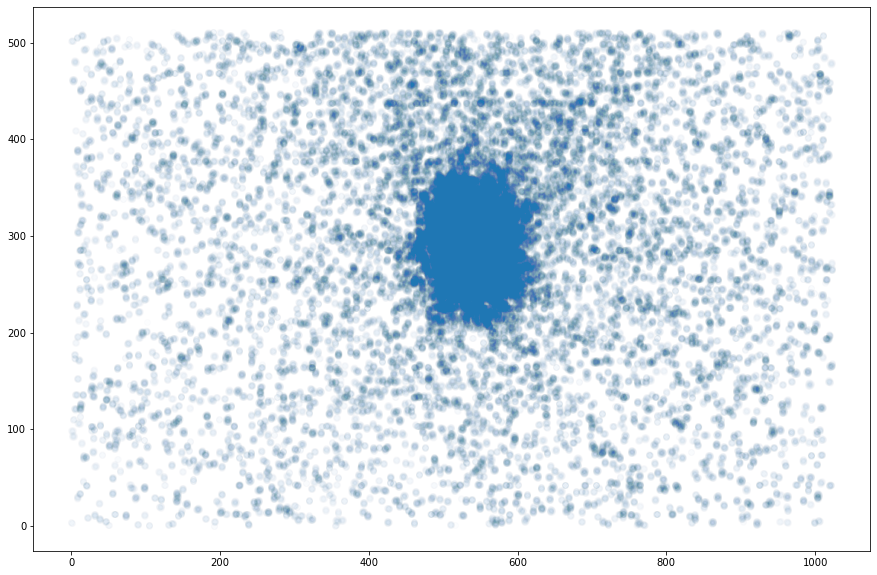

In [3]:
fig = plt.figure(figsize=(15,10))
plt.scatter(df.id_x, df.id_y, alpha=0.01)
plt.show()

# 2-d scatter plots for all three id_plane separately

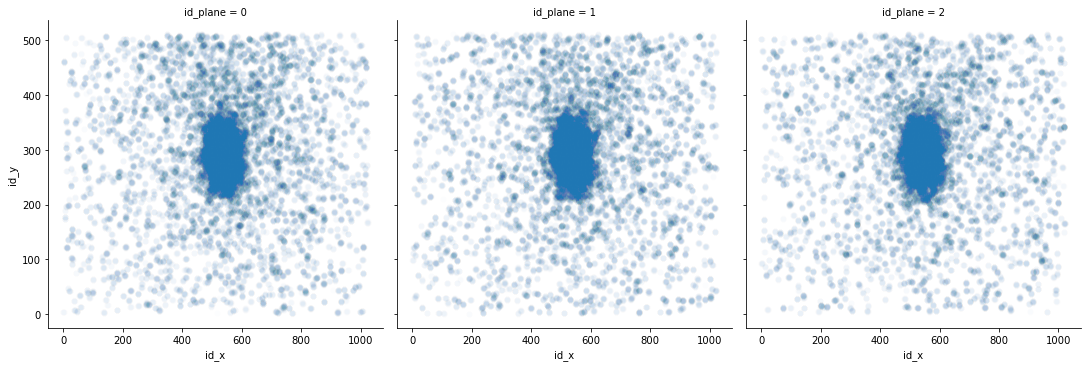

In [4]:
sns.relplot(x="id_x", y="id_y", data=df, kind='scatter', col='id_plane', alpha=0.01)

# 2D scatter plots for five i_event intervals.
#### In the first graph, the color separation by i_event
#### Intervals:
###### <50000
###### >50000 & <100000
###### >100000 & <150000
###### >150000 & <200000
###### >200000

<AxesSubplot:xlabel='id_x', ylabel='id_y'>

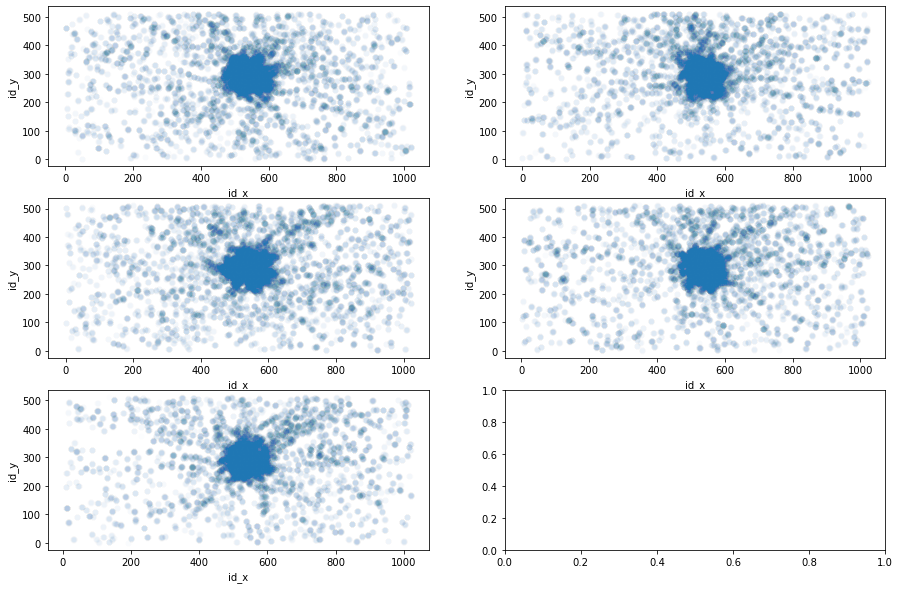

In [5]:
fig, ax = plt.subplots(3,2, figsize=(15,10))
sns.scatterplot(x='id_x', y='id_y', data=df[df['i_event'] <= 50000], alpha=0.01, ax=ax[0][0])

sns.scatterplot(x='id_x', y='id_y', data=df[(df['i_event'] > 50000) & (df['i_event'] <= 100000)] ,
                alpha=0.01, ax=ax[0][1])
sns.scatterplot(x='id_x', y='id_y', data=df[(df['i_event'] > 100000) & (df['i_event'] <= 150000)],
                alpha=0.01, ax=ax[1][0])
sns.scatterplot(x='id_x', y='id_y', data=df[(df['i_event'] > 150000) & (df['i_event'] <= 200000)],
                alpha=0.01, ax=ax[1][1])
sns.scatterplot(x='id_x', y='id_y', data=df[df['i_event'] > 200000],
                alpha=0.01, ax=ax[2][0])

## 2-D scatter plots for tracks with and without anomalies
#### two groups of tracks (each one has the same 'i_event') without anomaly,
#### and three groups with anomaly

<AxesSubplot:xlabel='id_x', ylabel='id_y'>

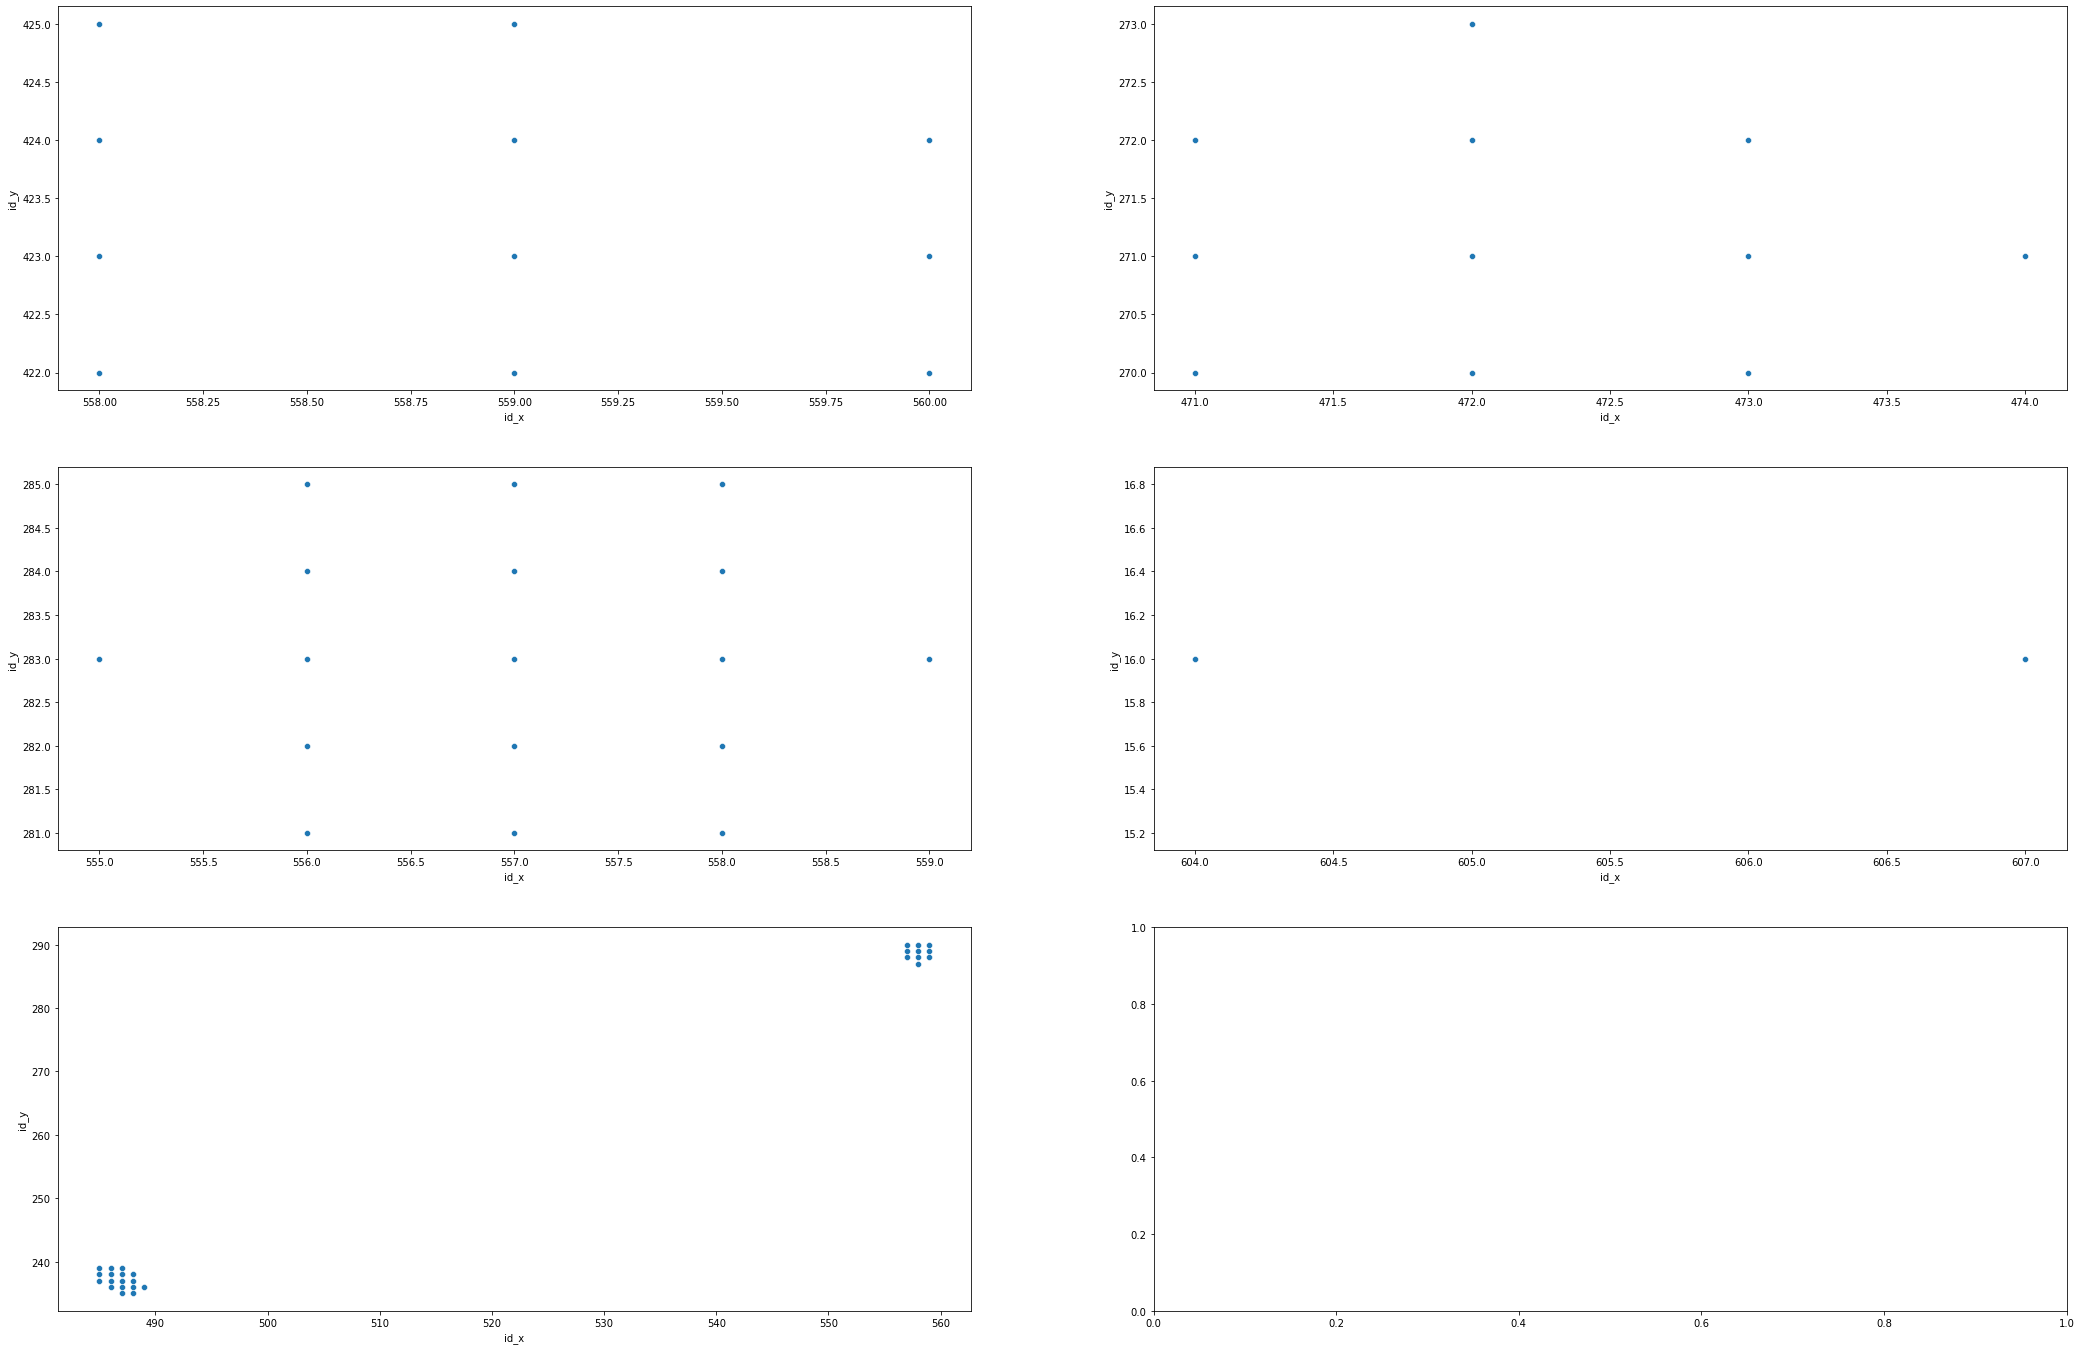

In [6]:
fig, ax = plt.subplots(3,2, figsize=(36,24))
sns.scatterplot(x='id_x', y='id_y', data=df[df['i_event']==47], ax=ax[0][0])
sns.scatterplot(x='id_x', y='id_y', data=df[df['i_event']==240306], ax=ax[0][1])
sns.scatterplot(x='id_x', y='id_y', data=df[df['i_event']==3007], ax=ax[1][0])
sns.scatterplot(x='id_x', y='id_y', data=df[df['i_event']==2656], ax=ax[1][1])
sns.scatterplot(x='id_x', y='id_y', data=df[df['i_event']==1966], ax=ax[2][0])

## The graph of the ratio of the i_time_stamp value to the i_event value

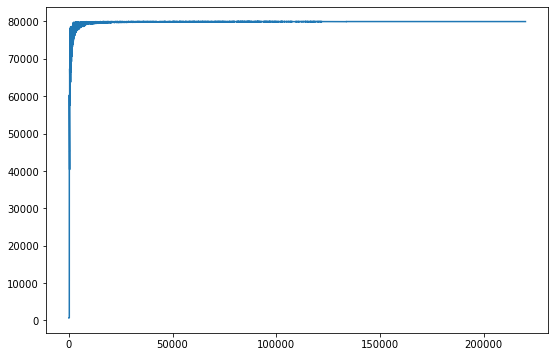

In [7]:
fig = plt.figure(figsize=(9,6))
i_event_help = []
i_time_stamp_help = []
for i,row in df.iterrows():
    i_event_help.append(row['i_event'])
    i_time_stamp_help.append(row['i_time_stamp'])
np_i_event = np.array(i_event_help)
np_i_time_stamp = np.array(i_time_stamp_help)
np_help = np_i_time_stamp / np_i_event
plt.plot(np_help)
plt.show()

## Correlation graph between all column values of the dataframe

<AxesSubplot:>

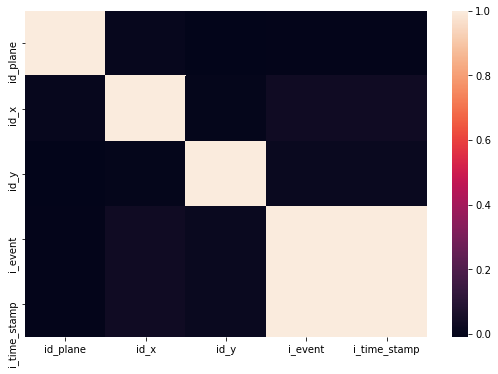

In [8]:
fig = plt.figure(figsize=(9,6))
sns.heatmap(df.corr())

# 3D scatter plot for the entire dataframe

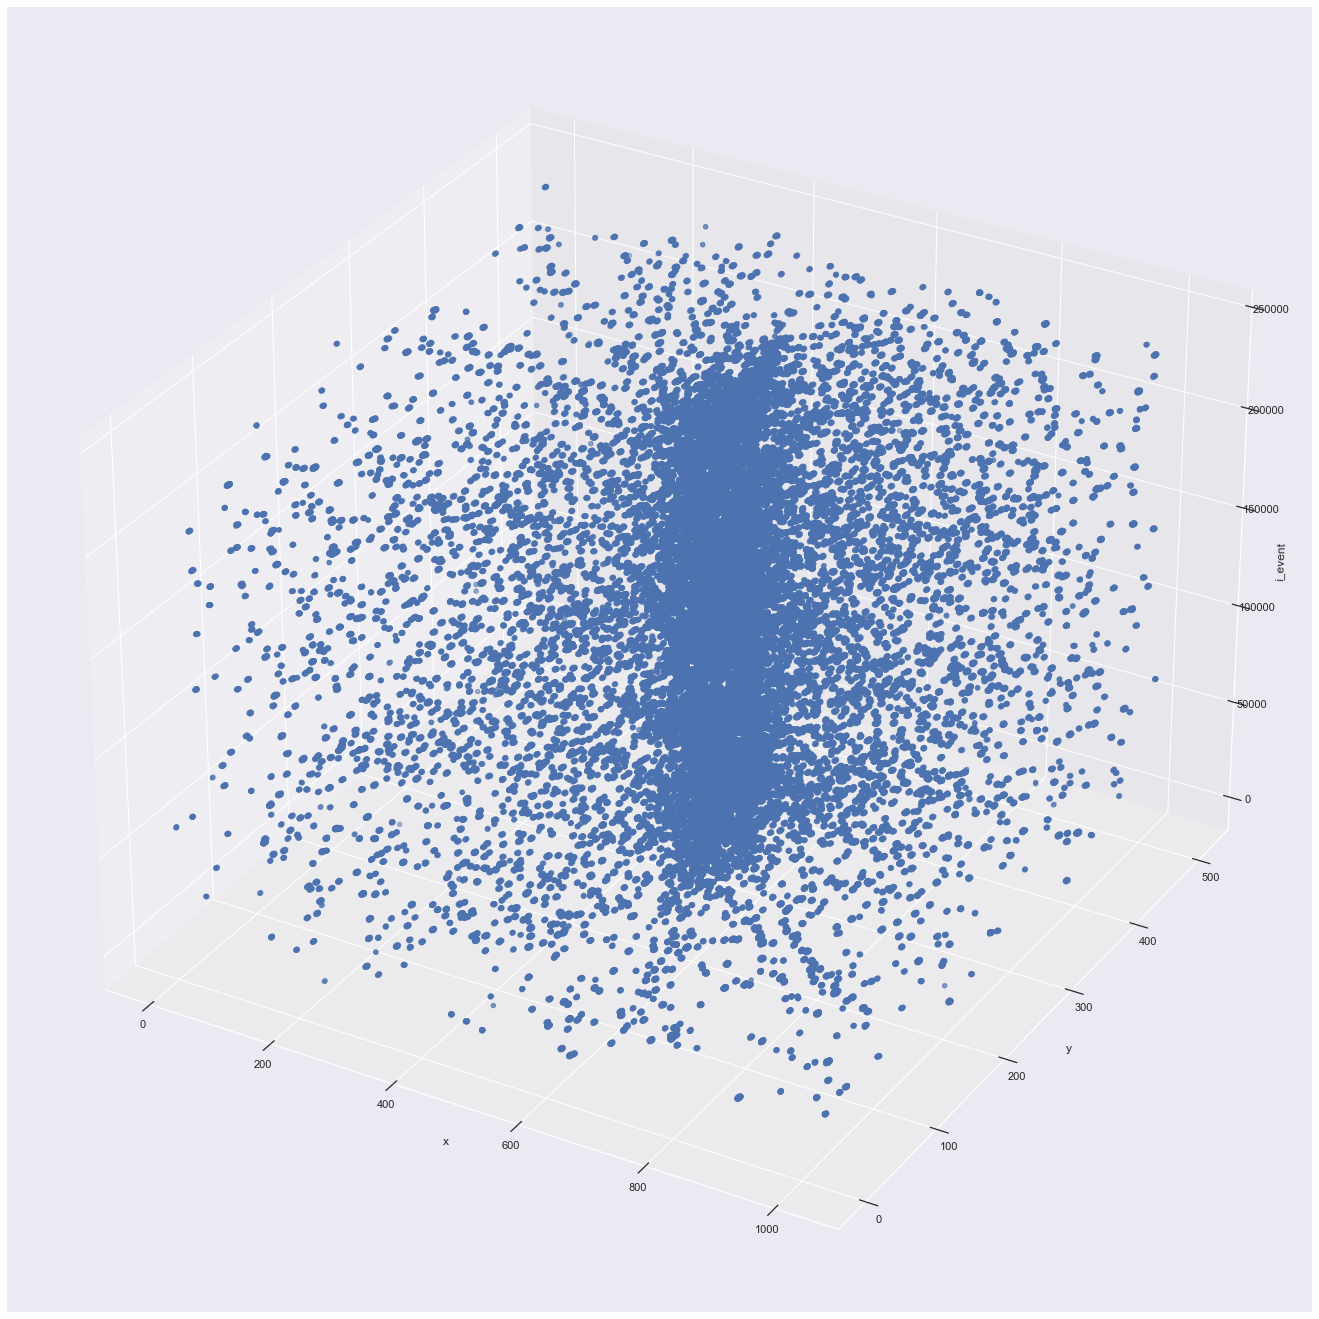

In [9]:
sns.set(style = "darkgrid")
fig = plt.figure(figsize=(36,24))
ax = fig.add_subplot(111, projection = '3d')

x = df['id_x']
y = df['id_y']
z = df['i_event']

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("i_event")

ax.scatter(x, y, z)

plt.show()

## 3D graph for the entire dateFrame,
### where the Z axis is id_plane

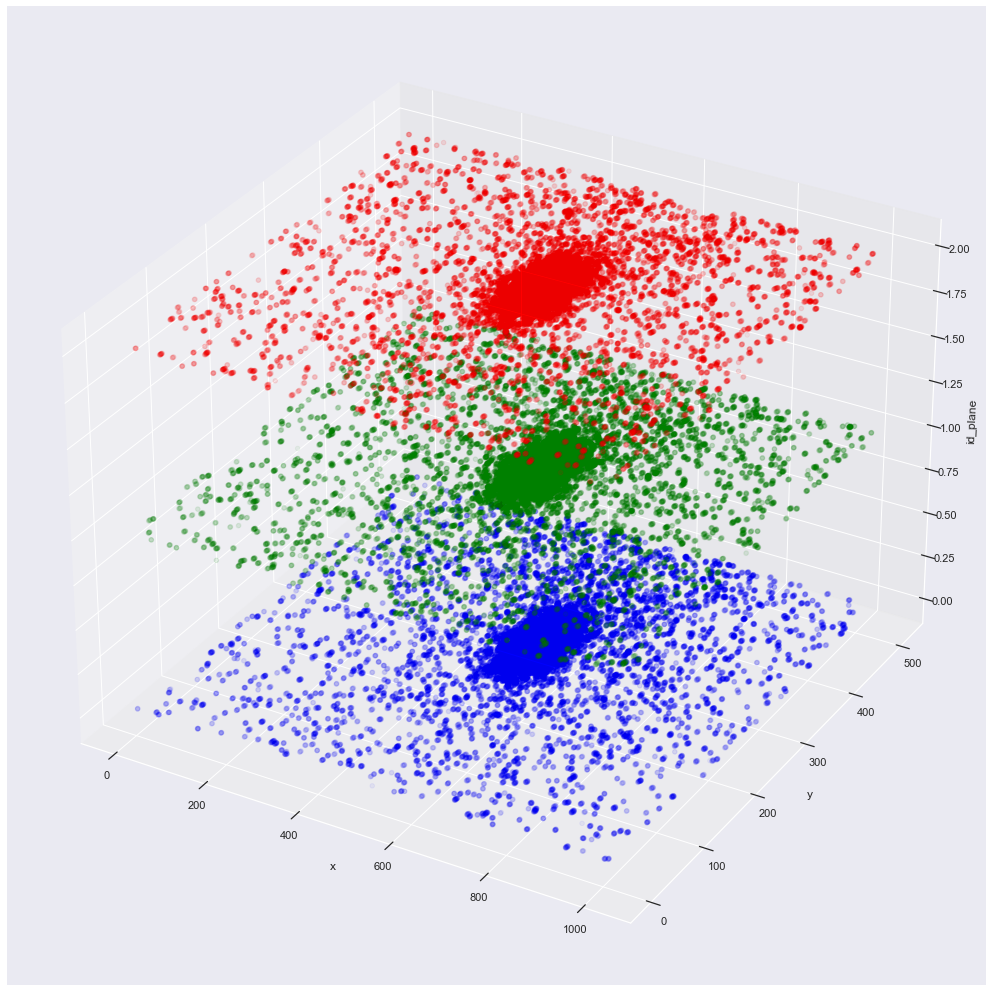

In [10]:
df_by_i_event = df.groupby(['i_event', 'id_plane'])[['id_x', 'id_y']].mean()
df_by_i_event = df_by_i_event.reset_index()


sns.set(style = "darkgrid")
fig = plt.figure(figsize=(27,18))
ax = fig.add_subplot(111, projection = '3d')

x = df['id_x']
y = df['id_y']
z = df['id_plane']

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("id_plane")

use_colours = {0: "blue", 1: "green", 2: "red"}
ax.scatter(x, y, z, c=[use_colours[x] for x in z], alpha=0.05)

plt.show()

In [11]:
# Grouping dataframe by i_event and id_plane values. Average and standard deviation are calculated for id_x and id_y values

df_grouped_by_i_event_and_id_plane = gdf.grouping_dataframe_\
    (df, ['i_event', 'id_plane'], ['id_x', 'id_y'], [np.mean, np.std])

# Dataframe with anomalies (i_event contains more than one group of items where the standard deviation is greater than five)
df_anomaly_by_coordinates = df_grouped_by_i_event_and_id_plane[((df_grouped_by_i_event_and_id_plane[('id_x', 'std')] >5) |
                                                   (df_grouped_by_i_event_and_id_plane[('id_y', 'std')] > 5))]

# Dataframe without anomalies (i_event contains one group of items where the standard deviation is less than five)
df_without_anomalies_by_coordinates = df_grouped_by_i_event_and_id_plane[(df_grouped_by_i_event_and_id_plane[('id_x', 'std')] <3) & \
                                                   (df_grouped_by_i_event_and_id_plane[('id_y', 'std')] <3)]

##Without anomalies and id_plane==0
df_without_anomalies_by_coordinates_id_plane_is_0 = df_without_anomalies_by_coordinates[df_without_anomalies_by_coordinates[('id_plane', )] == 0]

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2877: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


## 3D dataframe graph without anomalies
### with grouping and average id_x and id_y values

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2877: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


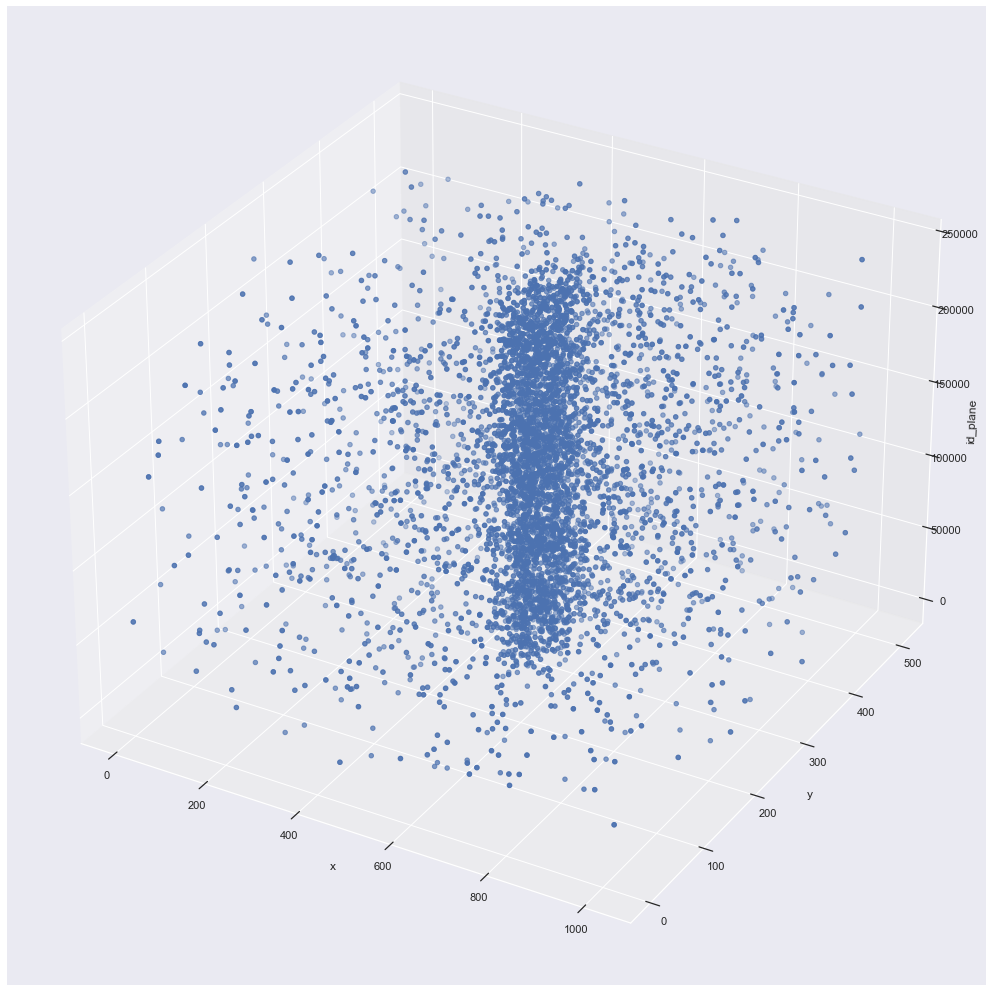

In [12]:
sns.set(style = "darkgrid")
fig = plt.figure(figsize=(27,18))
ax = fig.add_subplot(111, projection = '3d')

x = df_without_anomalies_by_coordinates_id_plane_is_0[('id_x', 'mean')]
y = df_without_anomalies_by_coordinates_id_plane_is_0[('id_y', 'mean')]
z = df_without_anomalies_by_coordinates_id_plane_is_0[('i_event', )]

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("id_plane")

ax.scatter(x, y, z)

plt.show()

## 3D graph of anomalies
### with grouping and average id_x and id_y values

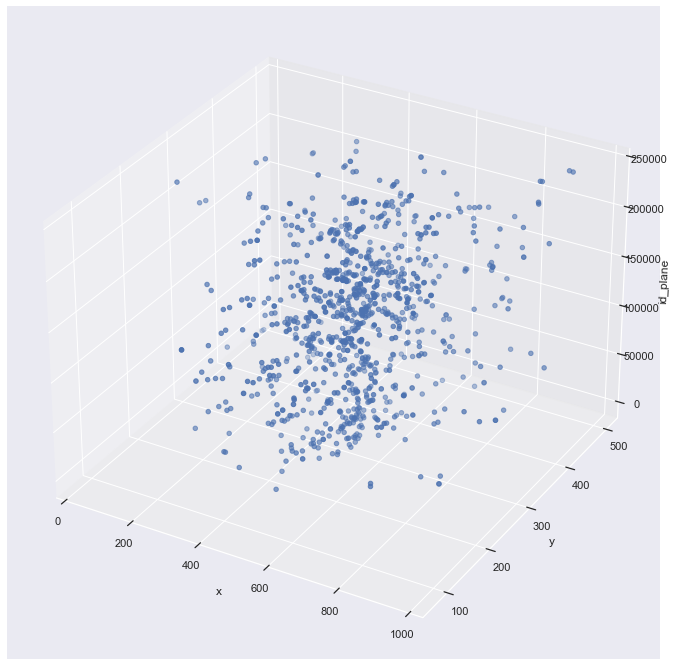

In [13]:
sns.set(style = "darkgrid")
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111, projection = '3d')

x = df_anomaly_by_coordinates[('id_x', 'mean')]
y = df_anomaly_by_coordinates[('id_y', 'mean')]
z = df_anomaly_by_coordinates[('i_event', )]

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("id_plane")

ax.scatter(x, y, z)

plt.show()


## 3d Plotly-scatter plot
#### of a small part of the dataframe for clarity

In [14]:
import plotly.express as px

df_test = df[(df['i_event']<100)]
df_test.head()

fig = px.scatter_3d(df_test, x='id_x', y='id_y', z='id_plane',
              color='id_plane')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()